<a href="https://colab.research.google.com/github/burrfer/TPF-CSS-UNAB/blob/main/1_Trabajo_Final_General.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCCIÓN
Para realizar el presente trabajo, el foco principal estuvo puesto en la iniciativa de inclusión digital y capacitación tecnológica conocida como ["Puntos Digitales"](https://www.argentina.gob.ar/jefatura/innovacion-publica/servicios-y-pais-digital/pais-digital/punto-digital). Cada uno de estos puntos es un *"espacio público de inclusión digital que brinda conectividad, capacitaciones y acceso a las nuevas Tecnologías de la Información y de la Comunicación (TIC)"*.

En este código, aplicaremos principalmente los modulos del Ciclo General: Fundamentos de las Ciencias Sociales Computacionales e Introducción al Aprendizaje Estadístico

In [1]:
#Importamos lo necesario (librerías, funciones, etc)
import pandas as pd
import numpy as np
from statistics import mode #Para obtener el valor de la moda
from scipy import stats #Para poder calcular el IQR

#Para montar Google Drive por si fuera necesario
from google.colab import drive
drive.mount('/content/drive')

#Para Graficar
import matplotlib.pyplot as plt #Librería para realizar histogramas.
from statsmodels.tools.tools import scipy
from scipy.stats import norm
from scipy.stats import kurtosis
from numpy.ma.core import std
from mpl_toolkits.mplot3d.axes3d import Normalize
import statsmodels.formula.api as smf #Para estimar modelos estadísticos

Mounted at /content/drive




```
# Esto tiene formato de código
```

# PUNTOS DIGITALES
Comenzamos a trabajar con el dataset que nos brinda Argentina.gob.ar de la sección "País digital", para ver los puntos digitales que hay en la provincia de Buenos Aires.
Podemos cargar dicho dataset directamente desde la URL. 

In [2]:
#Cargamos la url para tomar el dataset.
df_PD = pd.read_csv('https://servicios.puntodigital.paisdigital.modernizacion.gob.ar/ws/ws-eventos.php?method=getCsv')

In [3]:
#Listamos para ver la información que contiene cada columna.
df_PD.head(2)

,id_pd,nombre_pd,direccion,nombre_institucional,id_provincia,id_departamento,id_localidad,cod_bahra_localidad,id_municipio,provincia,departamento,localidad,municipio,mail_institucional,latitud,longitud,horarios,link_facebook,estado
0,40,Berisso I,33 S/N esquina 169 (Barrio Obrero),CIC,AR-B,1208,323,6098010004,BUE014,Buenos Aires,Berisso,Berisso,Berisso,berisso@puntodigital.gob.ar,-34.881902,-57.85778,"Lunes 08:00 a 17:00 , Martes 08:00 a 17:00 , M...",https://www.facebook.com/nac.berisso/?notif_t=...,Activo
1,41,Cañuelas,Mozotegui 807,Edificio Municipal,AR-B,1213,431,6134030000,BUE018,Buenos Aires,Cañuelas,Cañuelas,Cañuelas,canuelas@puntodigital.gob.ar,-35.049960,-58.76252,"Lunes 08:00 a 18:00 , Martes 08:00 a 18:00 , M...",https://www.facebook.com/Punto-Digital-Cañuela...,Activo


In [4]:
#Seleccionamos las columnas que nos interesan reemplazando el contenido anterior de la variable por uno más acotado.
df_PD = df_PD[['provincia','departamento','localidad','nombre_pd','direccion','latitud','longitud',]]
df_PD.head(2)

,provincia,departamento,localidad,nombre_pd,direccion,latitud,longitud
0,Buenos Aires,Berisso,Berisso,Berisso I,33 S/N esquina 169 (Barrio Obrero),-34.881902,-57.85778
1,Buenos Aires,Cañuelas,Cañuelas,Cañuelas,Mozotegui 807,-35.049960,-58.76252


Llegado este punto, decidimos que nos interesaba trabajar con el recorte correspondiente a la Provincia de Buenos Aires.
De acuerdo con esto vamos a seleccionar el conjunto de puntos digitales que se se encuentran en PBA.

In [5]:
#Con el método LOC seleccionamos el conjunto de elementos que hace referencia a "Buenos Aires" dentro de la columna "provincia" y reducimos el DF a ese conjunto.
#A partir de ahora, usaremos una nueva variable df_PDBSAS por "dataframe Puntos Digitales Buenos Aires"
df_PDBSAS = df_PD.loc[df_PD.loc[:, 'provincia'] == 'Buenos Aires']

In [6]:
#Chequeamos los valores de la forma final del dataframe
df_PDBSAS.shape

(143, 7)

In [7]:
#Renombramos la columna "departamento" por "partido" ya que en la Provincia de Buenos Aires no se utiliza dicho termino.
df_PDBSAS = df_PDBSAS.rename(columns={'departamento':'partido'})
#Chequeamos que los nombres de las columnas hayan quedado como esperabamos
df_PDBSAS.columns

Index(['provincia', 'partido', 'localidad', 'nombre_pd', 'direccion',
       'latitud', 'longitud'],
      dtype='object')

In [8]:
#Con la finalidad de ver que el dataframe guarda coherencia buscamos el partido "Lanus" para ver cuantos puntos digitales tiene (vemos que son 4)
#y lo comparamos con el mapa del sitio web: https://www.argentina.gob.ar/jefatura/innovacion-publica/servicios-y-pais-digital/pais-digital/punto-digital#877
#Luego encontramos coincidencia.
df_PDBSAS.loc[df_PDBSAS.loc[:, 'partido'] == 'Lanus']

,provincia,partido,localidad,nombre_pd,direccion,latitud,longitud
13,Buenos Aires,Lanus,Remedios Escalada de San Martin,Lanús I (Pupi),Monseñor Hladnik 3856,-34.715557,-58.417292
239,Buenos Aires,Lanus,Lanus Este,Lanús III (Velódromo),Córdoba 2300,-34.714971,-58.388110
280,Buenos Aires,Lanus,Lanus Oeste,Lanús IV (NIDO Jardín),Pje Aguirre,-34.677738,-58.434029
281,Buenos Aires,Lanus,Monte Chingolo,Lanús V (NIDO),Pitagoras 4550,-34.728690,-58.350705


In [9]:
#Hacemos los mismo con el partido de "Almirante Brown", partido donde se encuentra la UNAB, institución Sede de la Diplomatura.
#También encontramos coincidencia.
df_PDBSAS.loc[df_PDBSAS.loc[:, 'partido'] == 'Almirante Brown']

,provincia,partido,localidad,nombre_pd,direccion,latitud,longitud
587,Buenos Aires,Almirante Brown,Glew,Almirante Brown,Garibaldi 220,-34.874579,-58.358651


In [10]:
#Con el método groupby seleccionamos la columna partido y hacemos un count para contabilizar cuantos punto digitales hay por partido.
df_PDBSAS.groupby(["partido"])["partido"].count().reset_index(name="cantidad_pd")

,partido,cantidad_pd
0,Adolfo Alsina,1
1,Alberti,1
2,Almirante Brown,1
3,Arrecifes,1
4,Ayacucho,1
...,...,...
93,Tres de Febrero,1
94,Vicente Lopez,1
95,Villa Gesell,1
96,Villarino,1


In [11]:
#Creamos un nuevo DataFrame tomando la columna partido y cantidad de puntos digitales para guardarnos esta información.
#Le reseteamos el index al nuevo DF
df_cantidad_pd_partido = df_PDBSAS.groupby(["partido"])["partido"].count().reset_index(name="cantidad_pd")
df_cantidad_pd_partido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partido      98 non-null     object
 1   cantidad_pd  98 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [12]:
#El contenido de la columna "Partido" queremos convertirlo a tipo oración (Mayúscula al inicio, el resto minúscula)
#Esto permitirá que al hacer algún cruce no haya errores por diferencia en las mayúsculas o minúsculas de los caracteres.
#Entonces, usamos el método Title, "reemplazando" la columna original para que el método quede aplicado.
df_cantidad_pd_partido['partido'] = df_cantidad_pd_partido['partido'].str.title()
df_cantidad_pd_partido

,partido,cantidad_pd
0,Adolfo Alsina,1
1,Alberti,1
2,Almirante Brown,1
3,Arrecifes,1
4,Ayacucho,1
...,...,...
93,Tres De Febrero,1
94,Vicente Lopez,1
95,Villa Gesell,1
96,Villarino,1


In [15]:
#Vemos la info del df que quedó
df_cantidad_pd_partido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partido      98 non-null     object
 1   cantidad_pd  98 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [18]:
#Guardamos el dataset en Drive
df_cantidad_pd_partido.to_csv('/content/drive/MyDrive/FORMACIÓN/Evaluación Final/[Entregable] Evaluación Final Diplomatura  (Burrafato - Campilongo)/3 datasets output/df_cantidad_pd_partido.csv')

FileNotFoundError: ignored

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DENSIDAD POBLACIONAL
Una vez hecho el análisis básico y segmentación de los puntos digitales decidimos cruzar las ubicaciones con la densidad poblacional de las localidades de la Provincia.
Lo que buscabamos con esto era ver si existía algún tipo de relación entre ambos datos.

Cargamos un nuevo dataset con información sobre la densidad poblacional de la Provincia de Buenos Aires

In [19]:
#Cargamos el dataset desde el origen
df_densidadbsas_original = pd.read_excel('http://www.estadistica.ec.gba.gov.ar/dpe/images/Superficie_densidad_poblacion_urbana_rural_2010.xlsx')
df_densidadbsas_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Poblacion total, superficie, densidad y porcentaje de población urbana por municipio. Provincia de Buenos Aires. Año 2010  137 non-null    object 
 1   Unnamed: 1                                                                                                                 136 non-null    object 
 2   Unnamed: 2                                                                                                                 136 non-null    object 
 3   Unnamed: 3                                                                                                                 137 non-

In [20]:
#Vemos el encabezado de este excel, para determinar que ediciones realizarle para que nos quede útilizable
df_densidadbsas_original.head(10)

,"Poblacion total, superficie, densidad y porcentaje de población urbana por municipio. Provincia de Buenos Aires. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Municipios,Población 2010,Superficie (Km),Densidad hab/Km,Porcentaje población urbana,NaN,NaN
2,NaN,NaN,NaN,NaN,1991,2001.000000,2010.000000
3,NaN,NaN,NaN,%,NaN,NaN,NaN
4,Total Provincia,15625084,304906.7,51.24546,95.150923,96.362518,97.183469
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ADOLFO ALSINA,17072,5877.86,2.904458,64.064834,71.406587,75.427601
7,ADOLFO GONZALES CHAVES,12047,3859.16,3.121664,68.627912,71.554374,75.255250
8,ALBERTI,10654,1124.98,9.470391,70.170321,72.235612,77.529566
9,ALMIRANTE BROWN,552902,129.33,4275.125648,99.627245,99.793427,99.862001


In [21]:
#Vemos el pie de este excel, para determinar que ediciones realizarle para que nos quede útilizable
df_densidadbsas_original.tail(10)

,"Poblacion total, superficie, densidad y porcentaje de población urbana por municipio. Provincia de Buenos Aires. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
132,TRES ARROYOS,57110,5962.88,9.577587,83.118968,84.134582,89.320609
133,TRES DE FEBRERO,340071,43.04,7901.277881,100,100.000000,100.000000
134,TRES LOMAS,8700,1262.45,6.891362,84.465508,89.864229,92.655172
135,25 DE MAYO,35842,4769.45,7.514913,70.112694,76.270895,77.930919
136,VICENTE LÓPEZ,269420,33.77,7978.08706,100,100.000000,100.000000
137,VILLA GESELL,31730,165.45,191.779994,97.145891,95.778766,77.930919
138,VILLARINO,31014,10099.85,3.070739,51.676424,71.176981,75.894757
139,ZÁRATE,114269,1188.85,96.117256,94.767467,93.867939,95.162292
140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,Fuente: INDEC (2013) Censo Nacional de Poblaci...,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#Vemos que la función head interpreta como encabezado a la Fila 1, donde el excel tiene lo que sería el titulo del archivo:
#("Poblacion total, superficie, densidad y porcentaje de población urbana por municipio. Provincia de Buenos Aires. Año 2010")
#El resto de las posiciones del encabezado que dice "Unnamed:" son celdas que están vacías.
#En Index 0 toma a la Fila 2 que esta vacía
#En Index 1 toma a los que serían los reales encabezados para nosotros
#En Index 2 toma los años de los censos 1991, 2001, y 2010 que se corresponden con el Porcentaje población urbana de cada uno.
#Solo nos interesa el 2010 de la 7ma columna.
#En Index 3 esta todo vacío a excepción del simbolo %
#En Index 4,5 y 6 son datos totalizados que están al inicio. Tampoco nos interesan.

#Vemos que la función tail nos muestra al final una fila vacía (140) y una fila con una leyenda que cita
#la fuente de los datos y aporta datos a los fines del dataset

#Por lo tanto las acciones a tomar son:
#1. Ignorar las filas que en el index son 0,1,3,4,5,6
#2. Borrar las columnas 4 y 5 correspondientes a los censos 1991 y 2001 ya que no son de nuestro interés. 
#3. Renombrar la columna que corresponde al Censo 2010 a un nombre más legible.

df_densidadbsas = pd.read_excel('http://www.estadistica.ec.gba.gov.ar/dpe/images/Superficie_densidad_poblacion_urbana_rural_2010.xlsx', skiprows=[0,1,3,4,5,6,141,142])
df_densidadbsas = df_densidadbsas.drop(columns = ['Porcentaje población urbana', 'Unnamed: 5'])
df_densidadbsas = df_densidadbsas.rename(columns={'Unnamed: 6':'Porcentaje población urbana 2010'})
df_densidadbsas

,Municipios,Población 2010,Superficie (Km),Densidad hab/Km,Porcentaje población urbana 2010
0,ADOLFO ALSINA,17072,5877.86,2.904458,75.427601
1,ADOLFO GONZALES CHAVES,12047,3859.16,3.121664,75.255250
2,ALBERTI,10654,1124.98,9.470391,77.529566
3,ALMIRANTE BROWN,552902,129.33,4275.125648,99.862001
4,ARRECIFES,29044,1240.67,23.409932,90.896571
...,...,...,...,...,...
129,25 DE MAYO,35842,4769.45,7.514913,77.930919
130,VICENTE LÓPEZ,269420,33.77,7978.087060,100.000000
131,VILLA GESELL,31730,165.45,191.779994,77.930919
132,VILLARINO,31014,10099.85,3.070739,75.894757


El contenido de la Columna "Municipios" del dataframe de densidad tiende a coincidir con el de la columna "Partido" del dataframe de puntos digitales.

Esto nos va a permitir unir ambos dataframe, luego de realizar algunas modificaciones para que sea exacta la coincidencia.
Por un lado, aplicaremos el formato Tipo Oración para que ambas tengan el mismo formato y por el otro, renombraremos a la columna para que ambas se llamen igual.

In [23]:
#El contenido de la columna "Municipios" esta en Mayusculas, queremos convertirlo a tipo oración (Mayúscula al inicio, el resto minúscula).
#Entonces, usamos el método Title, "reemplazando" la columna original para que el método quede aplicado.
df_densidadbsas['Municipios'] = df_densidadbsas['Municipios'].str.title()
df_densidadbsas

,Municipios,Población 2010,Superficie (Km),Densidad hab/Km,Porcentaje población urbana 2010
0,Adolfo Alsina,17072,5877.86,2.904458,75.427601
1,Adolfo Gonzales Chaves,12047,3859.16,3.121664,75.255250
2,Alberti,10654,1124.98,9.470391,77.529566
3,Almirante Brown,552902,129.33,4275.125648,99.862001
4,Arrecifes,29044,1240.67,23.409932,90.896571
...,...,...,...,...,...
129,25 De Mayo,35842,4769.45,7.514913,77.930919
130,Vicente López,269420,33.77,7978.087060,100.000000
131,Villa Gesell,31730,165.45,191.779994,77.930919
132,Villarino,31014,10099.85,3.070739,75.894757


In [24]:
#Renombramos la columna Municipio, y de paso, simplificamos el nombre de la columna Densidad hab/km
df_densidadbsas = df_densidadbsas.rename(columns={'Municipios':'partido','Densidad hab/Km':'Densidad'})
df_densidadbsas.columns

Index(['partido', 'Población 2010', 'Superficie (Km)', 'Densidad',
       'Porcentaje población urbana 2010'],
      dtype='object')

In [25]:
#Reemplazamos las vocales con tildes, por vocales sin tilde para evitar errores al cruzar información.
df_densidadbsas['partido'] = [(str(i).replace("á", "a").replace("é", "e").replace("í", "i").replace("ó", "o").replace("ú", "u")) for i in df_densidadbsas['partido']]
df_densidadbsas

,partido,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010
0,Adolfo Alsina,17072,5877.86,2.904458,75.427601
1,Adolfo Gonzales Chaves,12047,3859.16,3.121664,75.255250
2,Alberti,10654,1124.98,9.470391,77.529566
3,Almirante Brown,552902,129.33,4275.125648,99.862001
4,Arrecifes,29044,1240.67,23.409932,90.896571
...,...,...,...,...,...
129,25 De Mayo,35842,4769.45,7.514913,77.930919
130,Vicente Lopez,269420,33.77,7978.087060,100.000000
131,Villa Gesell,31730,165.45,191.779994,77.930919
132,Villarino,31014,10099.85,3.070739,75.894757


In [26]:
df_densidadbsas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   partido                           134 non-null    object 
 1   Población 2010                    134 non-null    int64  
 2   Superficie (Km)                   134 non-null    float64
 3   Densidad                          134 non-null    float64
 4   Porcentaje población urbana 2010  134 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.4+ KB


In [27]:
#Guardamos el dataset en Drive
df_densidadbsas.to_csv('/content/drive/MyDrive/FORMACIÓN/Evaluación Final/[Entregable] Evaluación Final Diplomatura  (Burrafato - Campilongo)/3 datasets output/df_densidadbsas.csv')

FileNotFoundError: ignored

# DATAFRAMES UNIDOS

Guiandonos por los resultados obtenidos hasta ahora en los info, sabemos que tenemos 143 puntos digitales, repartidos en 98 partidos (de 134 existentes).

Buscaremos unir ambos dataframe para que quede reflejada toda la información. Gracias a esto, vemos fácilmente que hay partidos que no tienen puntos digitales. Son aquellos que tienen el campo nulo ("Nan") en la columna "cantidad_pd"

In [28]:
#Por medio del método merge, hacemos el join de manera tal que utilizando la condición outer
#tomará todas las etiquetas presentes en ambos dataframes.
#Al hacerlo detectamos que teníamos un partido de diferencia. Esto es por "Coronel De Marina Leonardo Rosales".
#En uno de los df estaba abreviado como "Coronel De Marina L. Rosales"
#Hacemos un replace para evitar dicho error así el merge nos da 134 partidos

df_densidadbsas['partido'] = [str(i).replace("Coronel De Marina L. Rosales", "Coronel De Marina Leonardo Rosales") for i in df_densidadbsas['partido']]

#Ahora si, hacemos el merge que nos dará 134 partidos
df_cantidad_pd_partido.merge(df_densidadbsas, how = 'outer', sort=True)


,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010
0,25 De Mayo,NaN,35842,4769.45,7.514913,77.930919
1,9 De Julio,NaN,47722,4284.05,11.139459,82.066971
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601
3,Adolfo Gonzales Chaves,NaN,12047,3859.16,3.121664,75.255250
4,Alberti,1.0,10654,1124.98,9.470391,77.529566
...,...,...,...,...,...,...
129,Tres Lomas,1.0,8700,1262.45,6.891362,92.655172
130,Vicente Lopez,1.0,269420,33.77,7978.087060,100.000000
131,Villa Gesell,1.0,31730,165.45,191.779994,77.930919
132,Villarino,1.0,31014,10099.85,3.070739,75.894757


In [29]:
#Generamos un nuevo dataframe con el resultado de la unión.
df_union = df_cantidad_pd_partido.merge(df_densidadbsas, how = 'outer', sort=True)
df_union.head(10)

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010
0,25 De Mayo,NaN,35842,4769.45,7.514913,77.930919
1,9 De Julio,NaN,47722,4284.05,11.139459,82.066971
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601
3,Adolfo Gonzales Chaves,NaN,12047,3859.16,3.121664,75.255250
4,Alberti,1.0,10654,1124.98,9.470391,77.529566
5,Almirante Brown,1.0,552902,129.33,4275.125648,99.862001
6,Arrecifes,1.0,29044,1240.67,23.409932,90.896571
7,Avellaneda,NaN,342677,52.48,6529.668445,100.000000
8,Ayacucho,1.0,20337,6748.90,3.013380,85.381325
9,Azul,1.0,65280,6540.25,9.981270,94.624694


In [30]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   partido                           134 non-null    object 
 1   cantidad_pd                       98 non-null     float64
 2   Población 2010                    134 non-null    int64  
 3   Superficie (Km)                   134 non-null    float64
 4   Densidad                          134 non-null    float64
 5   Porcentaje población urbana 2010  134 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.3+ KB


In [31]:
#Chequeamos que la suma total de puntos digitales sea 143 como en nuestro primer dataset
df_union['cantidad_pd'].sum()

143.0

**DATASET UNIDOS**

Ahora que llegamos a esta punto vamos a comprobar si por medio de la unión de los dos DF trabajados podemos arrojar nueva información.

Esta búsqueda se centrará en detectar los partidos (municipios) de la Provincia de Buenos Aires que no cuentan con puntos digitales y por otra parte conocer la relación de densidad poblacional con los partidos que sí cuentan con puntos digitales.

## PARTIDOS SIN PUNTOS DIGITALES

In [32]:
#Listamos los datos faltantes Nan (Not a Number) de la columna que contiene la Cantidad de Partidos. O sea, los partidos sin puntos digitales.
#Generamos un nuevo DF para agrupar a los valor NaN de la columna "cantidad_pd" reseteando su index.
df_union_nan = df_union[df_union['cantidad_pd'].isnull()].reset_index(drop=True)
df_union_nan

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010
0,25 De Mayo,NaN,35842,4769.45,7.514913,77.930919
1,9 De Julio,NaN,47722,4284.05,11.139459,82.066971
2,Adolfo Gonzales Chaves,NaN,12047,3859.16,3.121664,75.255250
3,Avellaneda,NaN,342677,52.48,6529.668445,100.000000
4,Benito Juarez,NaN,20239,5071.94,3.990386,83.838134
5,Berazategui,NaN,324244,221.01,1467.101036,99.972860
6,Brandsen,NaN,26367,1126.02,23.416103,84.852277
7,Capitan Sarmiento,NaN,14494,548.89,26.406019,90.299434
8,Carmen De Areco,NaN,14692,1061.31,13.843269,86.952083
9,Colon,NaN,24890,994.57,25.025891,93.234231


In [33]:
df_union_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   partido                           36 non-null     object 
 1   cantidad_pd                       0 non-null      float64
 2   Población 2010                    36 non-null     int64  
 3   Superficie (Km)                   36 non-null     float64
 4   Densidad                          36 non-null     float64
 5   Porcentaje población urbana 2010  36 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.8+ KB


In [34]:
#Definimos una función nueva para agregar una columna con la descripción de cada fila del DF.
def puntodigital_info(row):

  # Seleccionamos la columna y declaramos las variables.  
  partido = row.partido 
  poblacion = row['Población 2010']
  superficie = row['Superficie (Km)']
  nulo = row.cantidad_pd

  # Generamos la descripcion a partir de las variables.
  info = f"""El partido de {partido} con una población de {poblacion} y una superficie de {superficie} km2, no posee punto digital dado que su valor es {nulo}"""

  return info

In [35]:
# Para aplicar la función creada usamos lambda
df_union_nan["Descripcion"] = df_union.apply(lambda row: puntodigital_info(row), axis=1)
df_union_nan

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010,Descripcion
0,25 De Mayo,NaN,35842,4769.45,7.514913,77.930919,El partido de 25 De Mayo con una población de ...
1,9 De Julio,NaN,47722,4284.05,11.139459,82.066971,El partido de 9 De Julio con una población de ...
2,Adolfo Gonzales Chaves,NaN,12047,3859.16,3.121664,75.255250,El partido de Adolfo Alsina con una población ...
3,Avellaneda,NaN,342677,52.48,6529.668445,100.000000,El partido de Adolfo Gonzales Chaves con una p...
4,Benito Juarez,NaN,20239,5071.94,3.990386,83.838134,El partido de Alberti con una población de 106...
5,Berazategui,NaN,324244,221.01,1467.101036,99.972860,El partido de Almirante Brown con una població...
6,Brandsen,NaN,26367,1126.02,23.416103,84.852277,El partido de Arrecifes con una población de 2...
7,Capitan Sarmiento,NaN,14494,548.89,26.406019,90.299434,El partido de Avellaneda con una población de ...
8,Carmen De Areco,NaN,14692,1061.31,13.843269,86.952083,El partido de Ayacucho con una población de 20...
9,Colon,NaN,24890,994.57,25.025891,93.234231,El partido de Azul con una población de 65280 ...


## RELACIÓN PARTIDOS Y PUNTOS DIGITALES

In [36]:
#Ahora que identificamos y guardamos de forma separada los partidos que no poseen puntos digitales, vamos
#a remplazar el valor NaN por el número cero, de manera de poder trabajar más cómodos con ese valor.
#Para ello usamos el método fillna y la función inplace para que los cambios se consoliden en el DF.
df_union.fillna(0, inplace=True)
df_union

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010
0,25 De Mayo,0.0,35842,4769.45,7.514913,77.930919
1,9 De Julio,0.0,47722,4284.05,11.139459,82.066971
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601
3,Adolfo Gonzales Chaves,0.0,12047,3859.16,3.121664,75.255250
4,Alberti,1.0,10654,1124.98,9.470391,77.529566
...,...,...,...,...,...,...
129,Tres Lomas,1.0,8700,1262.45,6.891362,92.655172
130,Vicente Lopez,1.0,269420,33.77,7978.087060,100.000000
131,Villa Gesell,1.0,31730,165.45,191.779994,77.930919
132,Villarino,1.0,31014,10099.85,3.070739,75.894757


In [37]:
#Generamos un nuevo DF usando un groupby a partir de las columnas "partido" y "cantidad_pd" para hacer un conteo de las cantidades.
df_cantidadpd = df_union.groupby(['cantidad_pd'])['cantidad_pd'].count().reset_index(name='partido')
df_cantidadpd = df_cantidadpd.rename(columns={'partido':'cantidad_partidos'}) #Renombramos la columna.
df_cantidadpd

,cantidad_pd,cantidad_partidos
0,0.0,36
1,1.0,71
2,2.0,18
3,3.0,3
4,4.0,5
5,7.0,1


De esta manera nos quedan agrupados la cantidad de partidos según la cantidad de puntos digitales que posean



##HISTOGRAMA CANTIDAD DE PARTIDOS/CANTIDAD DE PUNTOS DIGITALES

<function matplotlib.pyplot.show(*args, **kw)>

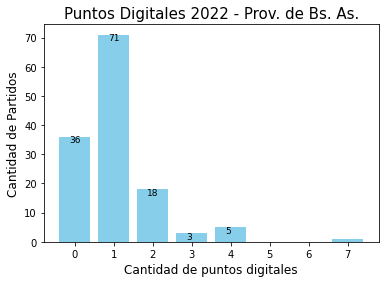

In [38]:
#Ahora vamos a confeccionar un el histograma para el DF "df_cantidadpd", con el objetivo de visualizar
#los resultados obtenidos hasta aquí.
plt.bar(df_cantidadpd['cantidad_pd'], df_cantidadpd['cantidad_partidos'], color='skyblue')
plt.xlabel('Cantidad de puntos digitales', size=12)
plt.ylabel('Cantidad de Partidos', size=12)
plt.title('Puntos Digitales 2022 - Prov. de Bs. As.', size=15)
#Con esta líneas de código generamos las estiquetas para cada barra,
#que nos permite ver las cantidades de partidos en relación a la cantidad de puntos digitales que tiene.
for i, label in enumerate(df_cantidadpd['cantidad_partidos']):
    plt.annotate(str(round(label)), xy=(i-0.15, float(label)-2), fontsize=9)
plt.show

El gráfico de arriba nos muestra que:
*   36 partidos no tienen Puntos Digitales
*   71 partidos tienen 1 punto digital
*   18 partidos tienen 2 puntos digitales
*   3 partidos tienen 3 puntos digitales
*   4 partidos tienen 5 puntos digitales
*   1 partido tiene 7 puntos digitales (La Matanza).

## CLASIFICACIÓN PARTIDOS SEGÚN DENSIDAD
Tomamos como criterio la clasificación empleada por el Gobierno de la Provincia de Bs. As. en la Cartografía ["Población y Densidad Poblacional por Partido" de los "Resultados Definitivos del Censo Nacional de Población Hogares y Viviendas 2010"](http://www.estadistica.ec.gba.gov.ar/dpe/images/cartografia/pdf/Densidad_Poblacion_Censo2010.pdf)

Siguiente este criterio usamos una medida que va del 1 al 5, siendo 1 la minima y 5 la máxima.


In [39]:
#Creamos la función "Clasificación"
def clasificacion(row):
  if row>=5000:
    row = 5
  elif row>= 1000 and row< 5000:
    row = 4
  elif row>= 100 and row< 1000:
    row = 3
  elif row>= 10 and row< 100:
    row = 2
  elif row>= 0 and row< 10:
    row = 1
  
  return row

In [40]:
#Aplicamos la función en el dataframe unido
#Creamos una nueva columna en el DF "df_union", para aplicar la clasificación realizada arriba.
df_union['clasificacionxdensidad'] =  df_union['Densidad'].apply(clasificacion)
df_union.head(10)

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010,clasificacionxdensidad
0,25 De Mayo,0.0,35842,4769.45,7.514913,77.930919,1
1,9 De Julio,0.0,47722,4284.05,11.139459,82.066971,2
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601,1
3,Adolfo Gonzales Chaves,0.0,12047,3859.16,3.121664,75.255250,1
4,Alberti,1.0,10654,1124.98,9.470391,77.529566,1
5,Almirante Brown,1.0,552902,129.33,4275.125648,99.862001,4
6,Arrecifes,1.0,29044,1240.67,23.409932,90.896571,2
7,Avellaneda,0.0,342677,52.48,6529.668445,100.000000,5
8,Ayacucho,1.0,20337,6748.90,3.013380,85.381325,1
9,Azul,1.0,65280,6540.25,9.981270,94.624694,1


In [41]:
#Guardamos el dataset en Drive
df_union.to_csv('/content/drive/MyDrive/FORMACIÓN/Evaluación Final/[Entregable] Evaluación Final Diplomatura  (Burrafato - Campilongo)/3 datasets output/df_union.csv')

FileNotFoundError: ignored

In [42]:
#Agrupamos la Cantidad de Partidos que hay según cada valor de la escala
df_union.groupby(['clasificacionxdensidad'])['clasificacionxdensidad'].count().reset_index(name="cantidad_partidos")

,clasificacionxdensidad,cantidad_partidos
0,1,52
1,2,43
2,3,17
3,4,9
4,5,13


In [43]:
#Agrupamos la Cantidad de Partidos que hay según cada valor de la escala
df_union.groupby(['clasificacionxdensidad','cantidad_pd'])['clasificacionxdensidad'].count().reset_index(name="cantidad_partidos")

,clasificacionxdensidad,cantidad_pd,cantidad_partidos
0,1,0.0,14
1,1,1.0,31
2,1,2.0,5
3,1,3.0,2
4,2,0.0,12
5,2,1.0,26
6,2,2.0,5
7,3,0.0,2
8,3,1.0,6
9,3,2.0,6


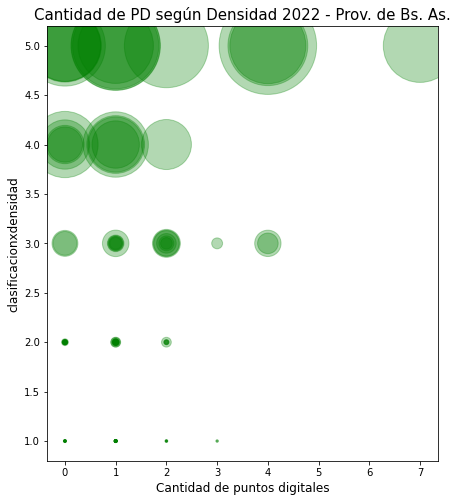

In [44]:
#Ahora vamos a realizar un gráfico para visualizar lo realizado.
#Cruzamos la información de las columnas "cantidad de puntos digitales"
#con la de la columna "clasificacion x densidad".

x = df_union['cantidad_pd']
y = df_union['clasificacionxdensidad']
area = df_union['Densidad']

plt.figure(figsize= (7,8))
plt.scatter(x, y, s=area, c='green', norm=Normalize, alpha=0.3)
plt.xlabel('Cantidad de puntos digitales', size=12)
plt.ylabel('clasificacionxdensidad', size=12)
plt.title('Cantidad de PD según Densidad 2022 - Prov. de Bs. As.', size=15)
plt.show()

Este gráfico muestra la relación entre la clasificación de municipios según el grado de densidad (1 al 5) y la cantidad de puntos digitales que tiene cada municipio.

Por ejemplo encontramos que hay un municipio que tiene 7 puntos digitales cuya densidad es 5, lo cual habla de cierta relación de proporcionalidad, mientras que al mismo tiempo visualizamos que hay municipios con alta densidad poblacional que no tienen puntos digitales.

En ese sentido, notamos que la mayor parte de los municipios de mayor densidad (nivel 5) tienen un solo punto digital.

Finalmente, se puede ver que hay municipios de baja densidad poblacional que cuentan con puntos digitales (¡incluso 3!).

# APRENDIZAJE ESTADISTICO




## TÉCNICAS DESCRIPTIVAS

### MEDIDAS DE TENDENCIA CENTRAL (ANÁLISIS Y APLICACIÓN) 




**Media aritmética o promedio**

In [72]:
#Calculamos el promedio de puntos digitales por municipios.
print(f"El promedio de puntos digitales por municipio es {round(df_union['cantidad_pd'].mean(),3)}.-")

El promedio de puntos digitales por municipio es 1.067.-


**Mediana (Representa el valor de la variable de posición central en un conjunto de datos)**

In [73]:
#Calculamos la mediana de las columnas: cantidad_pd, clasificacionxdensidad 
df_union.iloc[:,[1,6]].median()

cantidad_pd               1.0
clasificacionxdensidad    2.0
dtype: float64

**Moda (Es el valor que aparece con mayor frecuencia en un conjunto de datos)**




In [74]:
#Calculamos la moda sobre la columna cantidad_pd.
print(f"La cantidad de puntos digitales con mayor frecuencia en un municipio es {round(mode(df_union['cantidad_pd']))}.")

La cantidad de puntos digitales con mayor frecuencia en un municipio es 1.


In [75]:
#Calculamos la moda sobre la columna clasificacionxdensidad.
print(f"El valor de clasificación por densidad con mayor frecuencia en un municipio es {mode(df_union['clasificacionxdensidad'])}.")

El valor de clasificación por densidad con mayor frecuencia en un municipio es 1.


### MEDIDAS DE DISPERSIÓN O VARIABILIDAD (ANÁLISIS Y APLICACIÓN)

**Rango**


In [76]:
#El rango se puede calcular a mano usando esta función:
def rango (data):

  return f'El rango es {round(data.max()-data.min(),2)}'

rango(df_union['cantidad_pd'])

'El rango es 7.0'

**Varianza**

In [77]:
# Calculamos la varianza sobre la cantidad de puntos digitales.
print(f"La Varianza es {round(np.var(df_union['cantidad_pd']),3)}")

La Varianza es 1.093


**Desviación Estándar**

In [78]:
# Calculamos la desviación estándar sobre la cantidad de puntos digitales.
print(f"La Desviación estandar es {round(np.std(df_union['cantidad_pd']),3)}")

La Desviación estandar es 1.045


**Rango Intercuartílico**
(El IQR representa los valores que están entre el 25% hasta el 75% de la distribución)

In [79]:
iqr = stats.iqr(df_union['cantidad_pd'],interpolation='midpoint')
print(f"El rango intercuartílico de la columna cantidad_pd es {iqr}")

El rango intercuartílico de la columna cantidad_pd es 1.0


In [80]:
iqr = stats.iqr(df_union['clasificacionxdensidad'],interpolation='midpoint')
print(f"El rango intercuartílico de la columna clasificacionxdensidad es {iqr}")

El rango intercuartílico de la columna clasificacionxdensidad es 2.0


**Curtosis**

In [81]:
kurtosis(df_union['cantidad_pd'])

7.698292667014059

**Covarianza o asociación entre variables**

In [82]:
#Para medir la covarianza entre dos variables, podemos utilizar el método de COV de Numpy
#Seleccionamos cada variable.
x = np.array(df_union['clasificacionxdensidad'])
y = np.array(df_union['cantidad_pd'])

#Aplicamos el método
covarianza = np.cov(x,y)

covarianza

array([[1.64201549, 0.34227359],
       [0.34227359, 1.10071821]])

In [83]:
#Miremos la matriz que generó
covarianza[0][0]

1.642015486477384

**Correlación**

In [84]:
#La podemos calcular con Numpy. 
r = np.corrcoef(x,y)

#Miro la matriz de correlación
r

array([[1.        , 0.25459314],
       [0.25459314, 1.        ]])

In [85]:
#Me quedo solamente con los datos de correlación
round(r[0][1],3)

0.255

## TÉCNICAS VISUALIZACIÓN

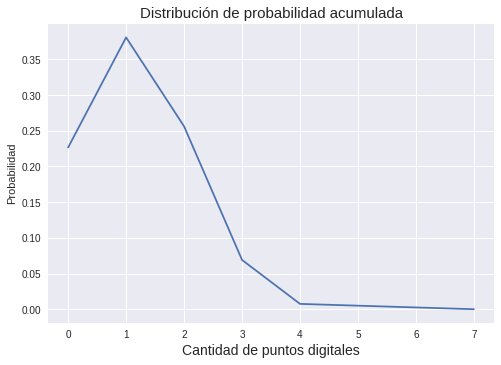

In [86]:
#Graficamos la función de distribución de probabilidad acumulada para la cantidad de puntos digitales.
mean = np.mean(df_union['cantidad_pd'])
std = np.std(df_union['cantidad_pd'])

plt.style.use('seaborn')

x = df_union['cantidad_pd']
x = np.sort(x)
mean = np.mean(x)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y)
plt.title("Distribución de probabilidad acumulada", fontsize=15)
plt.xlabel("Cantidad de puntos digitales", fontsize=14)
plt.ylabel("Probabilidad")
plt.show()


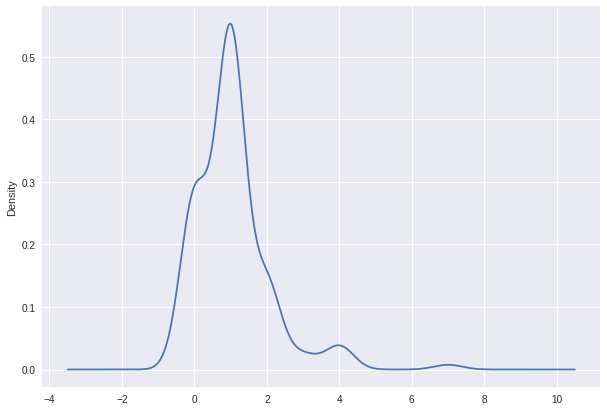

In [60]:
#Veamos la función de densidad (frecuencia relativa) para identificar su distribución.
df_union['cantidad_pd'].plot.density(figsize=(10,7))

La frecuencia relativa (función de densidad) corresponde a las veces que se repite un número en un conjunto de datos respecto al total.

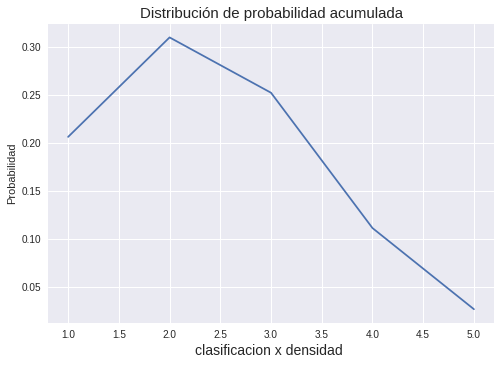

In [61]:
#Hacemos lo mismo para la clasificación por densidad
mean = np.mean(df_union['clasificacionxdensidad'])
std = np.std(df_union['clasificacionxdensidad'])

plt.style.use('seaborn')

x = df_union['clasificacionxdensidad']
x = np.sort(x)
mean = np.mean(x)

y = scipy.stats.norm.pdf(x,mean,std)

plt.plot(x,y)
plt.title("Distribución de probabilidad acumulada", fontsize=15)
plt.xlabel("clasificacion x densidad ", fontsize=14)
plt.ylabel("Probabilidad")
plt.show()

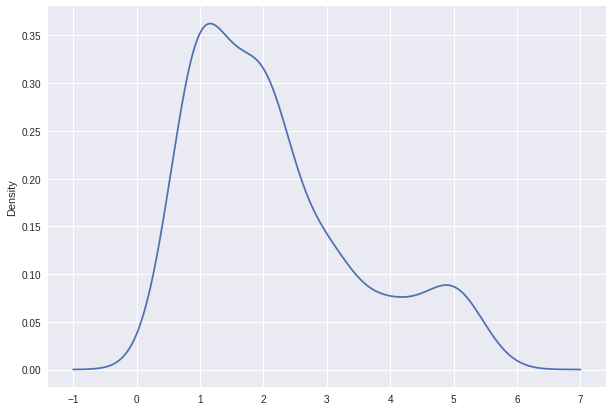

In [87]:
#Veamos la función de densidad (frecuencia relativa) para identificar su distribución.
df_union['clasificacionxdensidad'].plot.density(figsize=(10,7))

##TÉCNICAS DE APRENDIZAJE SUPERVISADO

### REGRESIÓN LINEAL

In [88]:
#creamos el modelo
lm = smf.ols(formula='cantidad_pd~Densidad',data=df_union).fit()

In [89]:
#También solicitamos todos los parámetros y resultados de mi regresión.
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            cantidad_pd   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     9.058
Date:                Mon, 13 Feb 2023   Prob (F-statistic):            0.00313
Time:                        21:45:50   Log-Likelihood:                -191.62
No. Observations:                 134   AIC:                             387.2
Df Residuals:                     132   BIC:                             393.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9522      0.096      9.926      0.000       0.762       1.142
Densidad       0.0001   4.31e-05      3.010      0.003    4.45e-05       0.000
==============================================================================
Omnibus:                       59.433   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.651
Skew:                           1.607   Prob(JB):                     1.22e-48
Kurtosis:                       8.403   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
#En función de nuevos datos hacemos la predicción. 
pd_prediccion = lm.predict(df_union['Densidad'])
pd_prediccion

0      0.953225
1      0.953695
2      0.952626
3      0.952654
4      0.953478
         ...   
129    0.953144
130    1.988124
131    0.977150
132    0.952648
133    0.964729
Length: 134, dtype: float64

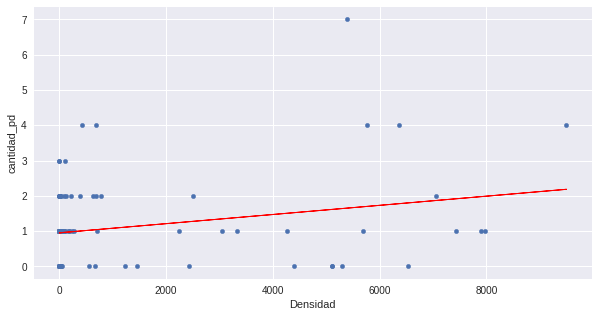

In [91]:
#Vamos a graficar los resultados.
#Grafica los datos
df_union.plot(kind='scatter',x='Densidad',y='cantidad_pd',grid=True,figsize=(10,5))
#Grafica la regresión
plt.plot(df_union['Densidad'],pd_prediccion,c='red',linewidth=1)

In [92]:
#Calculo del error standard residual
df_union['prediccion_pd'] = lm.params[0] + lm.params[1] * df_union['cantidad_pd']

#Veamos como queda
df_union

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010,clasificacionxdensidad,prediccion_pd,RSE
0,25 De Mayo,0.0,35842,4769.45,7.514913,77.930919,1,0.952249,0.906778
1,9 De Julio,0.0,47722,4284.05,11.139459,82.066971,2,0.952249,0.906778
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601,1,0.952379,0.002268
3,Adolfo Gonzales Chaves,0.0,12047,3859.16,3.121664,75.255250,1,0.952249,0.906778
4,Alberti,1.0,10654,1124.98,9.470391,77.529566,1,0.952379,0.002268
...,...,...,...,...,...,...,...,...,...
129,Tres Lomas,1.0,8700,1262.45,6.891362,92.655172,1,0.952379,0.002268
130,Vicente Lopez,1.0,269420,33.77,7978.087060,100.000000,5,0.952379,0.002268
131,Villa Gesell,1.0,31730,165.45,191.779994,77.930919,3,0.952379,0.002268
132,Villarino,1.0,31014,10099.85,3.070739,75.894757,1,0.952379,0.002268


In [93]:
# Cálculo de RSE 
df_union['RSE'] = (df_union['cantidad_pd'] - df_union['prediccion_pd'])**2
df_union

,partido,cantidad_pd,Población 2010,Superficie (Km),Densidad,Porcentaje población urbana 2010,clasificacionxdensidad,prediccion_pd,RSE
0,25 De Mayo,0.0,35842,4769.45,7.514913,77.930919,1,0.952249,0.906778
1,9 De Julio,0.0,47722,4284.05,11.139459,82.066971,2,0.952249,0.906778
2,Adolfo Alsina,1.0,17072,5877.86,2.904458,75.427601,1,0.952379,0.002268
3,Adolfo Gonzales Chaves,0.0,12047,3859.16,3.121664,75.255250,1,0.952249,0.906778
4,Alberti,1.0,10654,1124.98,9.470391,77.529566,1,0.952379,0.002268
...,...,...,...,...,...,...,...,...,...
129,Tres Lomas,1.0,8700,1262.45,6.891362,92.655172,1,0.952379,0.002268
130,Vicente Lopez,1.0,269420,33.77,7978.087060,100.000000,5,0.952379,0.002268
131,Villa Gesell,1.0,31730,165.45,191.779994,77.930919,3,0.952379,0.002268
132,Villarino,1.0,31014,10099.85,3.070739,75.894757,1,0.952379,0.002268


In [94]:
#SSD o Suma de los cuadrados de la diferencia
ssd = sum(df_union['RSE'])
ssd

148.12278625087427

In [95]:
#RSE o Error Estándar Residual
RSE = np.sqrt(ssd/len('partido')-2)
RSE

4.377259192215967

In [96]:
#Veamos el error del modelo
error = RSE / np.mean(df_union['cantidad_pd'])
error

4.101767354943633